<a href="https://colab.research.google.com/github/is0280fp/Gait/blob/main/test_LSTM_3DGRF_APCOP_without_HC_oversampling_5class_stratified_group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive 
drive.mount('/content/drive')

# Baseline

# import tensorflow as tf
# physical_devices = tf.config.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# StratifiedGroupKFoldの分割結果をpickle
import pickle

# test 
with open("/content/drive/MyDrive/test_data/V_test.pickle", mode="rb") as f:
   test_V = pickle.load(f)
f.close()
with open("/content/drive/MyDrive/test_data/AP_test.pickle", mode="rb") as f:
   tes_AP = pickle.load(f)
f.close()
with open("/content/drive/MyDrive/test_data/ML_test.pickle", mode="rb") as f:
   tes_ML = pickle.load(f)
f.close()

with open("/content/drive/MyDrive/test_data/COP_AP_test.pickle", mode="rb") as f:
   test_COP_AP = pickle.load(f)
f.close()
# with open("/content/drive/MyDrive/test_data/COP_ML_test.pickle", mode="rb") as f:
#    test_COP_ML = pickle.load(f)
# f.close()

with open("/content/drive/MyDrive/test_data/label_test.pickle", mode="rb") as f:
   test_label = pickle.load(f)
f.close()


# train
with open("/content/drive/MyDrive/test_data/Oversampling_without_HC/oversampled_V.pickle", mode="rb") as f:
   train_V_list = pickle.load(f)
f.close()
with open("/content/drive/MyDrive/test_data/Oversampling_without_HC/oversampled_AP.pickle", mode="rb") as f:
   train_AP_list = pickle.load(f)
f.close()
with open("/content/drive/MyDrive/test_data/Oversampling_without_HC/oversampled_ML.pickle", mode="rb") as f:
   train_ML_list = pickle.load(f)
f.close()
with open("/content/drive/MyDrive/test_data/Oversampling_without_HC/oversampled_COP_AP.pickle", mode="rb") as f:
   train_COP_AP_list = pickle.load(f)
f.close()
# with open("/content/drive/MyDrive/test_data/Oversampling_without_HC/oversampled_COP_ML.pickle", mode="rb") as f:
#    train_COP_ML_list = pickle.load(f)
# f.close()
with open("/content/drive/MyDrive/test_data/Oversampling_without_HC/oversampled_training_label.pickle", mode="rb") as f:
   train_label_list = pickle.load(f)
f.close()

# validation

with open("/content/drive/MyDrive/test_data/label_val_train.pickle", mode="rb") as f:
   val_train_label = pickle.load(f)
f.close()

with open("/content/drive/MyDrive/test_data/val_idx_list.pickle", mode="rb") as f:
   val_index_list = pickle.load(f)
f.close()

with open("/content/drive/MyDrive/test_data/V_val_train.pickle", mode="rb") as f:
   val_train_V = pickle.load(f)
f.close()
with open("/content/drive/MyDrive/test_data/AP_val_train.pickle", mode="rb") as f:
   val_train_AP = pickle.load(f)
f.close()
with open("/content/drive/MyDrive/test_data/ML_val_train.pickle", mode="rb") as f:
   val_train_ML = pickle.load(f)
f.close()

with open("/content/drive/MyDrive/test_data/COP_AP_val_train.pickle", mode="rb") as f:
   val_train_COP_AP = pickle.load(f)
f.close()
# with open("/content/drive/MyDrive/test_data/COP_ML_val_train.pickle", mode="rb") as f:
#    val_train_COP_ML = pickle.load(f)
# f.close()

In [ ]:
# import os
# print(os.getcwd())

# # os.chdir("C:\\Users\\clasi\\OneDrive\\デスクトップ\\test_data\\test_data\\")
# os.chdir("C:\\Users\\mm101\\Desktop\\test_data\\")

In [ ]:
# # StratifiedGroupKFoldの分割結果をpickle
# import pickle

# # test 
# with open("V_test.pickle", mode="rb") as f:
#    test_V = pickle.load(f)
# f.close()
# with open("AP_test.pickle", mode="rb") as f:
#    tes_AP = pickle.load(f)
# f.close()
# with open("ML_test.pickle", mode="rb") as f:
#    tes_ML = pickle.load(f)
# f.close()

# with open("COP_AP_test.pickle", mode="rb") as f:
#    test_COP_AP = pickle.load(f)
# f.close()
# with open("COP_ML_test.pickle", mode="rb") as f:
#    test_COP_ML = pickle.load(f)
# f.close()

# with open("label_test.pickle", mode="rb") as f:
#    test_label = pickle.load(f)
# f.close()


# # train
# with open("oversampled_V.pickle", mode="rb") as f:
#    train_V_list = pickle.load(f)
# f.close()
# with open("oversampled_AP.pickle", mode="rb") as f:
#    train_AP_list = pickle.load(f)
# f.close()
# with open("oversampled_ML.pickle", mode="rb") as f:
#    train_ML_list = pickle.load(f)
# f.close()
# with open("oversampled_COP_AP.pickle", mode="rb") as f:
#    train_COP_AP_list = pickle.load(f)
# f.close()
# with open("oversampled_COP_ML.pickle", mode="rb") as f:
#    train_COP_ML_list = pickle.load(f)
# f.close()
# with open("oversampled_training_label.pickle", mode="rb") as f:
#    train_label_list = pickle.load(f)
# f.close()

# # validation

# with open("label_val_train.pickle", mode="rb") as f:
#    val_train_label = pickle.load(f)
# f.close()

# with open("val_idx_list.pickle", mode="rb") as f:
#    val_index_list = pickle.load(f)
# f.close()

# with open("V_val_train.pickle", mode="rb") as f:
#    val_train_V = pickle.load(f)
# f.close()
# with open("AP_val_train.pickle", mode="rb") as f:
#    val_train_AP = pickle.load(f)
# f.close()
# with open("ML_val_train.pickle", mode="rb") as f:
#    val_train_ML = pickle.load(f)
# f.close()

# with open("COP_AP_val_train.pickle", mode="rb") as f:
#    val_train_COP_AP = pickle.load(f)
# f.close()
# with open("COP_ML_val_train.pickle", mode="rb") as f:
#    val_train_COP_ML = pickle.load(f)
# f.close()

In [ ]:
# import sys

# print("{}{: >25}{}{: >10}{}".format('|','Variable Name','|','Memory','|'))
# print(" ------------------------------------ ")
# for var_name in dir():
#     if not var_name.startswith("_"):
#         print("{}{: >25}{}{: >10}{}".format('|',var_name,'|',sys.getsizeof(eval(var_name)),'|'))

In [13]:
import gc
gc.collect()

2374

In [4]:
# min_max normalizationする場合
from sklearn import preprocessing
mmscaler = preprocessing.MinMaxScaler(feature_range=(-1, 1), copy=True) # インスタンスの作成、活性化関数でtanhを使うのでfeature_range=(-1,1)

mmscaler.fit(val_train_V)
val_train_V = mmscaler.transform(val_train_V)
val_train_V = val_train_V.reshape(val_train_V.shape[0], val_train_V.shape[1], 1)

mmscaler.fit(val_train_AP)
val_train_AP = mmscaler.transform(val_train_AP)
val_train_AP = val_train_AP.reshape(val_train_AP.shape[0], val_train_AP.shape[1], 1)

mmscaler.fit(val_train_ML)
val_train_ML = mmscaler.transform(val_train_ML)
val_train_ML = val_train_ML.reshape(val_train_ML.shape[0], val_train_ML.shape[1], 1)

mmscaler.fit(val_train_COP_AP)
val_train_COP_AP = mmscaler.transform(val_train_COP_AP)
val_train_COP_AP = val_train_COP_AP.reshape(val_train_COP_AP.shape[0], val_train_COP_AP.shape[1], 1)

# mmscaler.fit(val_train_COP_ML)
# val_train_COP_ML = mmscaler.transform(val_train_COP_ML)
# val_train_COP_ML = val_train_COP_ML.reshape(val_train_COP_ML.shape[0], val_train_COP_ML.shape[1], 1)

In [5]:
# min_max normalizationする場合
from sklearn import preprocessing
mmscaler = preprocessing.MinMaxScaler(feature_range=(-1, 1), copy=True) # インスタンスの作成、活性化関数でtanhを使うのでfeature_range=(-1,1)

i = 0
for train_V in train_V_list:  
  mmscaler.fit(train_V)
  train_V = mmscaler.transform(train_V)
  train_V = train_V.reshape(train_V.shape[0], train_V.shape[1], 1)
  train_V_list[i] = train_V
  i = i+1

i = 0
for train_AP in train_AP_list:  
  mmscaler.fit(train_AP)
  train_AP = mmscaler.transform(train_AP)
  train_AP = train_AP.reshape(train_AP.shape[0], train_AP.shape[1], 1)
  train_AP_list[i] = train_AP
  i = i+1

i = 0
for train_ML in train_ML_list:  
  mmscaler.fit(train_ML)
  train_ML = mmscaler.transform(train_ML)
  train_ML = train_ML.reshape(train_ML.shape[0], train_ML.shape[1], 1)
  train_ML_list[i] = train_ML
  i = i+1

i = 0
for train_COP_AP in train_COP_AP_list:  
  mmscaler.fit(train_COP_AP)
  train_COP_AP = mmscaler.transform(train_COP_AP)
  train_COP_AP = train_COP_AP.reshape(train_COP_AP.shape[0], train_COP_AP.shape[1], 1)
  train_COP_AP_list[i] = train_COP_AP
  i = i+1

# i = 0
# for train_COP_ML in train_COP_ML_list:  
#   mmscaler.fit(train_COP_ML)
#   train_COP_ML = mmscaler.transform(train_COP_ML)
#   train_COP_ML = train_COP_ML.reshape(train_COP_ML.shape[0], train_COP_ML.shape[1], 1)
#   train_COP_ML_list[i] = train_COP_ML
#   i = i+1

In [14]:
!pip install keras-layer-normalization

In [15]:
del train_AP
del train_ML
del train_V
del train_COP_AP
# del train_COP_ML
# del train_data
# del train_label

NameError: ignored

In [ ]:
from keras import optimizers, regularizers
from keras.initializers import he_normal
from keras.layers import ELU, Conv2D, MaxPooling2D, LSTM, InputLayer, Dense, Dropout, Activation, Flatten, concatenate, Conv1D, MaxPooling1D, Input, Reshape, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D
from keras.layers.advanced_activations import PReLU
from keras.models import Model, Sequential
from keras.callbacks import TensorBoard, LearningRateScheduler, ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from keras.layers.normalization import BatchNormalization
from keras_layer_normalization import LayerNormalization
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import time
import math
import datetime

In [ ]:
from keras import optimizers, regularizers
from keras.initializers import he_normal
from keras.layers import ELU, Conv2D, MaxPooling2D, LSTM, InputLayer, Dense, Dropout, Activation, Flatten, concatenate, Conv1D, MaxPooling1D, Input, Reshape, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D
from keras.layers.advanced_activations import PReLU
from keras.models import Model, Sequential
from keras.callbacks import TensorBoard, LearningRateScheduler, ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from keras.layers.normalization import BatchNormalization
from keras_layer_normalization import LayerNormalization
# from keras_self_attention import SeqSelfAttention
import numpy as np
import keras
from sklearn.utils import class_weight

import seaborn as sns
import matplotlib.pyplot as plt
import time
import math
import datetime

NAME = "test_oversampleing_without_HC_3DGRF_APCOP_LSTM_5class_stratified_group"
i = 0

# 共通
now = datetime.datetime.now()

# early stopping
early_stopping = EarlyStopping(
                        monitor='val_loss',
                        min_delta=0.0,
                        patience=10,
                )

def decay_schedule(epoch, lr):
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % 80 == 0) and (epoch != 0):
        lr = lr * 0.1
    return lr

lr_scheduler = LearningRateScheduler(decay_schedule)

initializer = he_normal()

classes_main = 5

#LSTM-----------------------------------------------------------------------------------------------------------------------
def build_model():
  # LSTM
  # 最初これだけだった
  model = Sequential()
  model.add(InputLayer(input_shape=(101, 4)))

  model.add(Bidirectional(LSTM(512, return_sequences=True)))
  # model.add(LSTM(256, return_sequences=True))
  model.add(LayerNormalization())
  model.add(Activation('tanh'))
  model.add(Dropout(0.5))
  
  model.add(Flatten())

  model.add(Dense(512, kernel_initializer=initializer))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.5))

  model.add(Dense(256, kernel_initializer=initializer))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  # model.add(Dropout(0.5))

  model.add(Dense(128, kernel_initializer=initializer))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  # model.add(Dropout(0.5))

  model.add(Dense(64, kernel_initializer=initializer))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  # model.add(Dropout(0.5))

  model.add(Dense(classes_main, kernel_initializer=initializer))
  model.add(BatchNormalization())
  model.add(Activation('softmax'))

  model.summary()
  return model
#------------------------------------------------------------------------------------------------------------------------------------------------------

# k-fold目のモデルのval_accuracyとval_lossのログ
history = []
# 混合行列のログ
cmx_list = []
# F1などスコアのログ
report_list = []

val_label_list = []
used_train_label_list = []

val_LSTM_data_list = []
train_LSTM_data_list = []

i = 0
for i in range(0, 7):
  train_LSTM_data = np.concatenate([train_V_list[i], train_AP_list[i], train_ML_list[i], train_COP_AP_list[i]], axis=2)
  val_index = val_index_list[i]
  val_LSTM_data = np.concatenate([val_train_V[val_index], val_train_AP[val_index], val_train_ML[val_index], val_train_COP_AP[val_index]], axis=2)
  
  # label
  train_label = train_label_list[i] 
  val_label= val_train_label[val_index] 

  # シャッフル
  p = np.random.permutation(len(train_label))
  train_LSTM_data = train_LSTM_data[p]
  train_label = train_label[p]

  train_label = keras.utils.to_categorical(train_label, classes_main)
  val_label = keras.utils.to_categorical(val_label, classes_main)

  train_LSTM_data_list.append(train_LSTM_data)
  val_LSTM_data_list.append(val_LSTM_data)

  val_label_list.append(val_label)
  used_train_label_list.append(train_label)

  print("train_data", train_LSTM_data.shape)
  print("val_data", val_LSTM_data.shape)
  i = i+1

In [ ]:
for i in range(0, 7):
  # checkpointの設定
  checkpoint = ModelCheckpoint(
                      filepath="drive/MyDrive/saved_models/checkpoints/{}fold_{}.h5".format(i, NAME),
                      monitor='val_loss',
                      save_best_only=True,
                      period=1,
                      verbose=1
                  )
  model = build_model()
  model.compile(
      loss='categorical_crossentropy',
      optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
      metrics=['acc']
            )
  

  print("HC for train", np.where(np.argmax(train_label, axis=1)==0)[0].shape)
  print("H for train", np.where(np.argmax(train_label, axis=1)==1)[0].shape)
  print("K for train", np.where(np.argmax(train_label, axis=1)==2)[0].shape)
  print("A for train", np.where(np.argmax(train_label, axis=1)==3)[0].shape)
  print("C for train", np.where(np.argmax(train_label, axis=1)==4)[0].shape)

  print("HC for val", np.where(np.argmax(val_label, axis=1)==0)[0].shape)
  print("H for val", np.where(np.argmax(val_label, axis=1)==1)[0].shape)
  print("K for val", np.where(np.argmax(val_label, axis=1)==2)[0].shape)
  print("A for val", np.where(np.argmax(val_label, axis=1)==3)[0].shape)
  print("C for val", np.where(np.argmax(val_label, axis=1)==4)[0].shape)

  result = model.fit(
      x=train_LSTM_data_list[i], 
      y=used_train_label_list[i], 
      batch_size=63, 
      epochs=400, 
      verbose=1,
      validation_data=(
          val_LSTM_data_list[i], 
          val_label_list[i]
            ),
      callbacks=[early_stopping, checkpoint, lr_scheduler]
      )
  
  print("results per {}-fold".format(i))
  history.append(model.evaluate(
      x=val_LSTM_data_list[i], 
      y=val_label_list[i], 
      verbose=1))
  # save weights
  # file_name = "{}fold_{}".format(i, NAME)
  # model.save(file_name+'.h5')

    # 混合行列
  predict_prob = model.predict(val_LSTM_data_list[i])
  predict_classes=np.argmax(predict_prob,axis=1)
  true_classes = val_label_list[i]
  true_classes=np.argmax(true_classes, axis=1)
  cmx = confusion_matrix(true_classes, predict_classes)
  cmx_list.append(cmx)
  print(cmx)

  index = ["HC", "a_H", "a_K", "a_A", "a_C"]

  report = classification_report(true_classes, predict_classes, target_names=index)
  report_list.append(report)
  print(report)

  cmx_data = []
  for i in range(len(cmx)):
    for j in range(len(cmx)): 
      cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

  cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

  ax= plt.subplot()
  sns.heatmap(cmx_data, annot=True, ax = ax, fmt="1.3f", cmap="Blues")
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix') 
  ax.xaxis.set_ticklabels(index) 
  ax.yaxis.set_ticklabels(index)
  plt.show()

  i = i + 1



plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# now = datetime.datetime.now()
# with open("/content/drive/MyDrive/saved_models/test/cmx_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(cmx_list, f)
# f.close()

# with open("/content/drive/MyDrive/saved_models/test/classification_report_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(report_list, f)
# f.close()

now = datetime.datetime.now()

with open("cmx_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
   pickle.dump(cmx_list, f)
f.close()

with open("classification_report_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
   pickle.dump(report_list, f)
f.close()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 101, 1024)         2117632   
_________________________________________________________________
layer_normalization (LayerNo (None, 101, 1024)         2048      
_________________________________________________________________
activation (Activation)      (None, 101, 1024)         0         
_________________________________________________________________
dropout (Dropout)            (None, 101, 1024)         0         
_________________________________________________________________
flatten (Flatten)            (None, 103424)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               52953600  
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 101, 1024)         2117632   
_________________________________________________________________
layer_normalization (LayerNo (None, 101, 1024)         2048      
_________________________________________________________________
activation (Activation)      (None, 101, 1024)         0         
_________________________________________________________________
dropout (Dropout)            (None, 101, 1024)         0         
_________________________________________________________________
flatten (Flatten)            (None, 103424)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               52953600  
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2

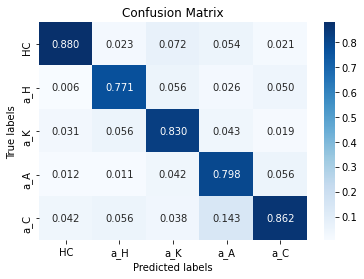

In [ ]:
#  続き 1fold 22 epoch finished
def decay_schedule(epoch, lr):
  # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
  if (epoch % 17 == 0) and (epoch != 0) and (epoch % 97 == 0):
      lr = lr * 0.1
  return lr

i = 0
# print("HC", np.where(np.argmax(train_label_list[i], axis=1)==0)[0].shape)
# print("H", np.where(np.argmax(train_label_list[i], axis=1)==1)[0].shape)
# print("K", np.where(np.argmax(train_label_list[i], axis=1)==2)[0].shape)
# print("A", np.where(np.argmax(train_label_list[i], axis=1)==3)[0].shape)
# print("C", np.where(np.argmax(train_label_list[i], axis=1)==4)[0].shape)

# checkpointの設定
checkpoint = ModelCheckpoint(
                  filepath="drive/MyDrive/saved_models/checkpoints/{}fold_{}.h5".format(i, NAME),
                    monitor='val_loss',
                    save_best_only=True,
                    period=1,
                    verbose=1
                )

model = build_model()
model.load_weights('/content/drive/MyDrive/saved_models/checkpoints/0fold_test_oversampleing_without_HC_3DGRF_APCOP_LSTM_5class_stratified_group.h5')
model.compile(
    loss='categorical_crossentropy',
    # loss = custom_cross_entropy,
    optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
    metrics=['acc'],
    # class_weight=class_weight
          )

result = model.fit(
    x=train_LSTM_data_list[i], 
    y=used_train_label_list[i], 
    batch_size=63, 
    epochs=400, 
    verbose=1,
    validation_data=(
        val_LSTM_data_list[i], 
        val_label_list[i]
          ),
    callbacks=[early_stopping, checkpoint, lr_scheduler]
    )

print("results per {}-fold".format(i))
history.append(model.evaluate(
    x=val_LSTM_data_list[i], 
    y=val_label_list[i], 
    verbose=1))
# save weights
# file_name = "{}fold_{}".format(i, NAME)
# model.save(file_name+'.h5')

  # 混合行列
predict_prob = model.predict(val_LSTM_data_list[i])
predict_classes=np.argmax(predict_prob,axis=1)
true_classes = val_label_list[i]
true_classes=np.argmax(true_classes, axis=1)
cmx = confusion_matrix(true_classes, predict_classes)
cmx_list.append(cmx)
print(cmx)

index = ["HC", "a_H", "a_K", "a_A", "a_C"]

report = classification_report(true_classes, predict_classes, target_names=index)
report_list.append(report)
print(report)

cmx_data = []
for i in range(len(cmx)):
  for j in range(len(cmx)): 
    cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

ax= plt.subplot()
sns.heatmap(cmx_data, annot=True, ax = ax, fmt="1.3f", cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(index) 
ax.yaxis.set_ticklabels(index)
plt.show()

# i = i + 1



# plt.plot(result.history['acc'])
# plt.plot(result.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.grid()
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()

# plt.plot(result.history['loss'])
# plt.plot(result.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.grid()
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()

# now = datetime.datetime.now()
# with open("cmx_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(cmx_list, f)
# f.close()

# with open("classification_report_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(report_list, f)
# f.close()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 101, 1024)         2117632   
_________________________________________________________________
layer_normalization_1 (Layer (None, 101, 1024)         2048      
_________________________________________________________________
activation_6 (Activation)    (None, 101, 1024)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 101, 1024)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 103424)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               52953600  
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)              

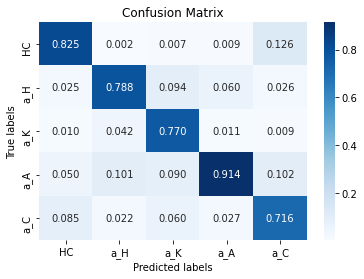

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 101, 1024)         2117632   
_________________________________________________________________
layer_normalization_2 (Layer (None, 101, 1024)         2048      
_________________________________________________________________
activation_12 (Activation)   (None, 101, 1024)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 101, 1024)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 103424)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               52953600  
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)              

KeyboardInterrupt: ignored

In [ ]:
for i in range(1, 7):
  # checkpointの設定
  checkpoint = ModelCheckpoint(
                      filepath="drive/MyDrive/saved_models/checkpoints/{}fold_{}.h5".format(i, NAME),
                      monitor='val_loss',
                      save_best_only=True,
                      period=1,
                      verbose=1
                  )
  model = build_model()
  model.compile(
      loss='categorical_crossentropy',
      optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
      metrics=['acc']
            )
  

  print("HC for train", np.where(np.argmax(train_label, axis=1)==0)[0].shape)
  print("H for train", np.where(np.argmax(train_label, axis=1)==1)[0].shape)
  print("K for train", np.where(np.argmax(train_label, axis=1)==2)[0].shape)
  print("A for train", np.where(np.argmax(train_label, axis=1)==3)[0].shape)
  print("C for train", np.where(np.argmax(train_label, axis=1)==4)[0].shape)

  print("HC for val", np.where(np.argmax(val_label, axis=1)==0)[0].shape)
  print("H for val", np.where(np.argmax(val_label, axis=1)==1)[0].shape)
  print("K for val", np.where(np.argmax(val_label, axis=1)==2)[0].shape)
  print("A for val", np.where(np.argmax(val_label, axis=1)==3)[0].shape)
  print("C for val", np.where(np.argmax(val_label, axis=1)==4)[0].shape)

  result = model.fit(
      x=train_LSTM_data_list[i], 
      y=used_train_label_list[i], 
      batch_size=63, 
      epochs=400, 
      verbose=1,
      validation_data=(
          val_LSTM_data_list[i], 
          val_label_list[i]
            ),
      callbacks=[early_stopping, checkpoint, lr_scheduler]
      )
  
  print("results per {}-fold".format(i))
  history.append(model.evaluate(
      x=val_LSTM_data_list[i], 
      y=val_label_list[i], 
      verbose=1))
  # save weights
  # file_name = "{}fold_{}".format(i, NAME)
  # model.save(file_name+'.h5')

    # 混合行列
  predict_prob = model.predict(val_LSTM_data_list[i])
  predict_classes=np.argmax(predict_prob,axis=1)
  true_classes = val_label_list[i]
  true_classes=np.argmax(true_classes, axis=1)
  cmx = confusion_matrix(true_classes, predict_classes)
  cmx_list.append(cmx)
  print(cmx)

  index = ["HC", "a_H", "a_K", "a_A", "a_C"]

  report = classification_report(true_classes, predict_classes, target_names=index)
  report_list.append(report)
  print(report)

  cmx_data = []
  for i in range(len(cmx)):
    for j in range(len(cmx)): 
      cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

  cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

  ax= plt.subplot()
  sns.heatmap(cmx_data, annot=True, ax = ax, fmt="1.3f", cmap="Blues")
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix') 
  ax.xaxis.set_ticklabels(index) 
  ax.yaxis.set_ticklabels(index)
  plt.show()

  i = i + 1



plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# now = datetime.datetime.now()
# with open("/content/drive/MyDrive/saved_models/test/cmx_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(cmx_list, f)
# f.close()

# with open("/content/drive/MyDrive/saved_models/test/classification_report_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(report_list, f)
# f.close()

now = datetime.datetime.now()

with open("cmx_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
   pickle.dump(cmx_list, f)
f.close()

with open("classification_report_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
   pickle.dump(report_list, f)
f.close()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 101, 1024)         2117632   
_________________________________________________________________
layer_normalization (LayerNo (None, 101, 1024)         2048      
_________________________________________________________________
activation (Activation)      (None, 101, 1024)         0         
_________________________________________________________________
dropout (Dropout)            (None, 101, 1024)         0         
_________________________________________________________________
flatten (Flatten)            (None, 103424)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               52953600  
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2

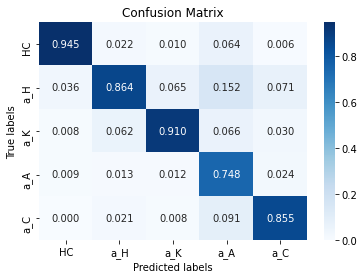

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 101, 1024)         2117632   
_________________________________________________________________
layer_normalization_1 (Layer (None, 101, 1024)         2048      
_________________________________________________________________
activation_6 (Activation)    (None, 101, 1024)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 101, 1024)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 103424)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               52953600  
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)              

In [ ]:
# for i in range(1, 7):
for i in range(2, 7):
  # checkpointの設定
  checkpoint = ModelCheckpoint(
                      filepath="drive/MyDrive/saved_models/checkpoints/{}fold_{}.h5".format(i, NAME),
                      monitor='val_loss',
                      save_best_only=True,
                      period=1,
                      verbose=1
                  )
  model = build_model()
  model.compile(
      loss='categorical_crossentropy',
      optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
      metrics=['acc']
            )
  

  print("HC for train", np.where(np.argmax(train_label, axis=1)==0)[0].shape)
  print("H for train", np.where(np.argmax(train_label, axis=1)==1)[0].shape)
  print("K for train", np.where(np.argmax(train_label, axis=1)==2)[0].shape)
  print("A for train", np.where(np.argmax(train_label, axis=1)==3)[0].shape)
  print("C for train", np.where(np.argmax(train_label, axis=1)==4)[0].shape)

  print("HC for val", np.where(np.argmax(val_label, axis=1)==0)[0].shape)
  print("H for val", np.where(np.argmax(val_label, axis=1)==1)[0].shape)
  print("K for val", np.where(np.argmax(val_label, axis=1)==2)[0].shape)
  print("A for val", np.where(np.argmax(val_label, axis=1)==3)[0].shape)
  print("C for val", np.where(np.argmax(val_label, axis=1)==4)[0].shape)

  result = model.fit(
      x=train_LSTM_data_list[i], 
      y=used_train_label_list[i], 
      batch_size=63, 
      epochs=400, 
      verbose=1,
      validation_data=(
          val_LSTM_data_list[i], 
          val_label_list[i]
            ),
      callbacks=[early_stopping, checkpoint, lr_scheduler]
      )
  
  print("results per {}-fold".format(i))
  history.append(model.evaluate(
      x=val_LSTM_data_list[i], 
      y=val_label_list[i], 
      verbose=1))
  # save weights
  # file_name = "{}fold_{}".format(i, NAME)
  # model.save(file_name+'.h5')

    # 混合行列
  predict_prob = model.predict(val_LSTM_data_list[i])
  predict_classes=np.argmax(predict_prob,axis=1)
  true_classes = val_label_list[i]
  true_classes=np.argmax(true_classes, axis=1)
  cmx = confusion_matrix(true_classes, predict_classes)
  cmx_list.append(cmx)
  print(cmx)

  index = ["HC", "a_H", "a_K", "a_A", "a_C"]

  report = classification_report(true_classes, predict_classes, target_names=index)
  report_list.append(report)
  print(report)

  cmx_data = []
  for i in range(len(cmx)):
    for j in range(len(cmx)): 
      cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

  cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

  ax= plt.subplot()
  sns.heatmap(cmx_data, annot=True, ax = ax, fmt="1.3f", cmap="Blues")
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix') 
  ax.xaxis.set_ticklabels(index) 
  ax.yaxis.set_ticklabels(index)
  plt.show()

  i = i + 1



plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# now = datetime.datetime.now()
# with open("/content/drive/MyDrive/saved_models/test/cmx_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(cmx_list, f)
# f.close()

# with open("/content/drive/MyDrive/saved_models/test/classification_report_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(report_list, f)
# f.close()

now = datetime.datetime.now()

with open("cmx_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
   pickle.dump(cmx_list, f)
f.close()

with open("classification_report_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
   pickle.dump(report_list, f)
f.close()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 101, 1024)         2117632   
_________________________________________________________________
layer_normalization (LayerNo (None, 101, 1024)         2048      
_________________________________________________________________
activation (Activation)      (None, 101, 1024)         0         
_________________________________________________________________
dropout (Dropout)            (None, 101, 1024)         0         
_________________________________________________________________
flatten (Flatten)            (None, 103424)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               52953600  
_________________________________________________________________
batch_normalization (BatchNo (None, 512)              

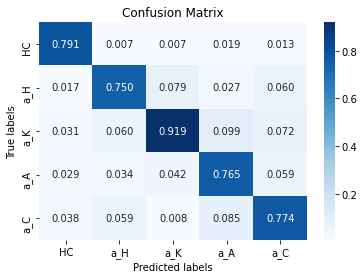

In [ ]:
#  続き 1fold 22 epoch finished
def decay_schedule(epoch, lr):
  # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
  if (epoch % 48 == 0) and (epoch != 0) and (epoch % 128 == 0):
      lr = lr * 0.1
  return lr

i = 3
# print("HC", np.where(np.argmax(train_label_list[i], axis=1)==0)[0].shape)
# print("H", np.where(np.argmax(train_label_list[i], axis=1)==1)[0].shape)
# print("K", np.where(np.argmax(train_label_list[i], axis=1)==2)[0].shape)
# print("A", np.where(np.argmax(train_label_list[i], axis=1)==3)[0].shape)
# print("C", np.where(np.argmax(train_label_list[i], axis=1)==4)[0].shape)

# checkpointの設定
checkpoint = ModelCheckpoint(
                  filepath="drive/MyDrive/saved_models/checkpoints/{}fold_{}.h5".format(i, NAME),
                    monitor='val_loss',
                    save_best_only=True,
                    period=1,
                    verbose=1
                )

model = build_model()
model.load_weights('/content/drive/MyDrive/saved_models/checkpoints/3fold_test_oversampleing_without_HC_3DGRF_APCOP_LSTM_5class_stratified_group.h5')
model.compile(
    loss='categorical_crossentropy',
    # loss = custom_cross_entropy,
    optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
    metrics=['acc'],
    # class_weight=class_weight
          )

result = model.fit(
    x=train_LSTM_data_list[i], 
    y=used_train_label_list[i], 
    batch_size=63, 
    epochs=400, 
    verbose=1,
    validation_data=(
        val_LSTM_data_list[i], 
        val_label_list[i]
          ),
    callbacks=[early_stopping, checkpoint, lr_scheduler]
    )

print("results per {}-fold".format(i))
history.append(model.evaluate(
    x=val_LSTM_data_list[i], 
    y=val_label_list[i], 
    verbose=1))
# save weights
# file_name = "{}fold_{}".format(i, NAME)
# model.save(file_name+'.h5')

  # 混合行列
predict_prob = model.predict(val_LSTM_data_list[i])
predict_classes=np.argmax(predict_prob,axis=1)
true_classes = val_label_list[i]
true_classes=np.argmax(true_classes, axis=1)
cmx = confusion_matrix(true_classes, predict_classes)
cmx_list.append(cmx)
print(cmx)

index = ["HC", "a_H", "a_K", "a_A", "a_C"]

report = classification_report(true_classes, predict_classes, target_names=index)
report_list.append(report)
print(report)

cmx_data = []
for i in range(len(cmx)):
  for j in range(len(cmx)): 
    cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

ax= plt.subplot()
sns.heatmap(cmx_data, annot=True, ax = ax, fmt="1.3f", cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(index) 
ax.yaxis.set_ticklabels(index)
plt.show()

# i = i + 1



# plt.plot(result.history['acc'])
# plt.plot(result.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.grid()
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()

# plt.plot(result.history['loss'])
# plt.plot(result.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.grid()
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()

# now = datetime.datetime.now()
# with open("cmx_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(cmx_list, f)
# f.close()

# with open("classification_report_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(report_list, f)
# f.close()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 101, 1024)         2117632   
_________________________________________________________________
layer_normalization (LayerNo (None, 101, 1024)         2048      
_________________________________________________________________
activation (Activation)      (None, 101, 1024)         0         
_________________________________________________________________
dropout (Dropout)            (None, 101, 1024)         0         
_________________________________________________________________
flatten (Flatten)            (None, 103424)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               52953600  
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2

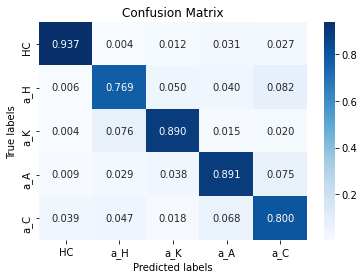

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 101, 1024)         2117632   
_________________________________________________________________
layer_normalization_1 (Layer (None, 101, 1024)         2048      
_________________________________________________________________
activation_6 (Activation)    (None, 101, 1024)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 101, 1024)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 103424)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               52953600  
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)              

In [ ]:
# for i in range(1, 7):

#  続き 1fold 22 epoch finished
def decay_schedule(epoch, lr):
  # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
  if (epoch % 80 == 0) and (epoch != 0):
      lr = lr * 0.1
  return lr

for i in range(4, 7):
  # checkpointの設定
  checkpoint = ModelCheckpoint(
                      filepath="drive/MyDrive/saved_models/checkpoints/{}fold_{}.h5".format(i, NAME),
                      monitor='val_loss',
                      save_best_only=True,
                      period=1,
                      verbose=1
                  )
  model = build_model()
  model.compile(
      loss='categorical_crossentropy',
      optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
      metrics=['acc']
            )
  

  print("HC for train", np.where(np.argmax(train_label, axis=1)==0)[0].shape)
  print("H for train", np.where(np.argmax(train_label, axis=1)==1)[0].shape)
  print("K for train", np.where(np.argmax(train_label, axis=1)==2)[0].shape)
  print("A for train", np.where(np.argmax(train_label, axis=1)==3)[0].shape)
  print("C for train", np.where(np.argmax(train_label, axis=1)==4)[0].shape)

  print("HC for val", np.where(np.argmax(val_label, axis=1)==0)[0].shape)
  print("H for val", np.where(np.argmax(val_label, axis=1)==1)[0].shape)
  print("K for val", np.where(np.argmax(val_label, axis=1)==2)[0].shape)
  print("A for val", np.where(np.argmax(val_label, axis=1)==3)[0].shape)
  print("C for val", np.where(np.argmax(val_label, axis=1)==4)[0].shape)

  result = model.fit(
      x=train_LSTM_data_list[i], 
      y=used_train_label_list[i], 
      batch_size=63, 
      epochs=400, 
      verbose=1,
      validation_data=(
          val_LSTM_data_list[i], 
          val_label_list[i]
            ),
      callbacks=[early_stopping, checkpoint, lr_scheduler]
      )
  
  print("results per {}-fold".format(i))
  history.append(model.evaluate(
      x=val_LSTM_data_list[i], 
      y=val_label_list[i], 
      verbose=1))
  # save weights
  # file_name = "{}fold_{}".format(i, NAME)
  # model.save(file_name+'.h5')

    # 混合行列
  predict_prob = model.predict(val_LSTM_data_list[i])
  predict_classes=np.argmax(predict_prob,axis=1)
  true_classes = val_label_list[i]
  true_classes=np.argmax(true_classes, axis=1)
  cmx = confusion_matrix(true_classes, predict_classes)
  cmx_list.append(cmx)
  print(cmx)

  index = ["HC", "a_H", "a_K", "a_A", "a_C"]

  report = classification_report(true_classes, predict_classes, target_names=index)
  report_list.append(report)
  print(report)

  cmx_data = []
  for i in range(len(cmx)):
    for j in range(len(cmx)): 
      cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

  cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

  ax= plt.subplot()
  sns.heatmap(cmx_data, annot=True, ax = ax, fmt="1.3f", cmap="Blues")
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix') 
  ax.xaxis.set_ticklabels(index) 
  ax.yaxis.set_ticklabels(index)
  plt.show()

  i = i + 1



plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# now = datetime.datetime.now()
# with open("/content/drive/MyDrive/saved_models/test/cmx_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(cmx_list, f)
# f.close()

# with open("/content/drive/MyDrive/saved_models/test/classification_report_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(report_list, f)
# f.close()

now = datetime.datetime.now()

with open("cmx_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
   pickle.dump(cmx_list, f)
f.close()

with open("classification_report_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
   pickle.dump(report_list, f)
f.close()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 101, 1024)         2117632   
_________________________________________________________________
layer_normalization (LayerNo (None, 101, 1024)         2048      
_________________________________________________________________
activation (Activation)      (None, 101, 1024)         0         
_________________________________________________________________
dropout (Dropout)            (None, 101, 1024)         0         
_________________________________________________________________
flatten (Flatten)            (None, 103424)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               52953600  
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2

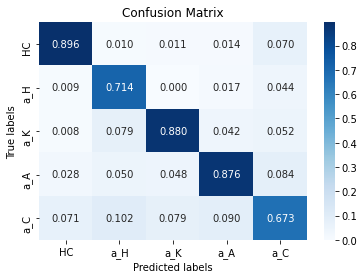

In [10]:
#  続き 1fold 22 epoch finished
def decay_schedule(epoch, lr):
  # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
  if (epoch % 57 == 0) and (epoch != 0) and (epoch % 137 == 0):
      lr = lr * 0.1
  return lr

i = 5
# print("HC", np.where(np.argmax(train_label_list[i], axis=1)==0)[0].shape)
# print("H", np.where(np.argmax(train_label_list[i], axis=1)==1)[0].shape)
# print("K", np.where(np.argmax(train_label_list[i], axis=1)==2)[0].shape)
# print("A", np.where(np.argmax(train_label_list[i], axis=1)==3)[0].shape)
# print("C", np.where(np.argmax(train_label_list[i], axis=1)==4)[0].shape)

# checkpointの設定
checkpoint = ModelCheckpoint(
                  filepath="drive/MyDrive/saved_models/checkpoints/{}fold_{}.h5".format(i, NAME),
                    monitor='val_loss',
                    save_best_only=True,
                    period=1,
                    verbose=1
                )

model = build_model()
model.load_weights('/content/drive/MyDrive/saved_models/checkpoints//5fold_test_oversampleing_without_HC_3DGRF_APCOP_LSTM_5class_stratified_group.h5')
model.compile(
    loss='categorical_crossentropy',
    # loss = custom_cross_entropy,
    optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
    metrics=['acc'],
    # class_weight=class_weight
          )

result = model.fit(
    x=train_LSTM_data_list[i], 
    y=used_train_label_list[i], 
    batch_size=63, 
    epochs=400, 
    verbose=1,
    validation_data=(
        val_LSTM_data_list[i], 
        val_label_list[i]
          ),
    callbacks=[early_stopping, checkpoint, lr_scheduler]
    )

print("results per {}-fold".format(i))
history.append(model.evaluate(
    x=val_LSTM_data_list[i], 
    y=val_label_list[i], 
    verbose=1))
# save weights
# file_name = "{}fold_{}".format(i, NAME)
# model.save(file_name+'.h5')

  # 混合行列
predict_prob = model.predict(val_LSTM_data_list[i])
predict_classes=np.argmax(predict_prob,axis=1)
true_classes = val_label_list[i]
true_classes=np.argmax(true_classes, axis=1)
cmx = confusion_matrix(true_classes, predict_classes)
cmx_list.append(cmx)
print(cmx)

index = ["HC", "a_H", "a_K", "a_A", "a_C"]

report = classification_report(true_classes, predict_classes, target_names=index)
report_list.append(report)
print(report)

cmx_data = []
for i in range(len(cmx)):
  for j in range(len(cmx)): 
    cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

ax= plt.subplot()
sns.heatmap(cmx_data, annot=True, ax = ax, fmt="1.3f", cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(index) 
ax.yaxis.set_ticklabels(index)
plt.show()

# i = i + 1



# plt.plot(result.history['acc'])
# plt.plot(result.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.grid()
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()

# plt.plot(result.history['loss'])
# plt.plot(result.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.grid()
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()

# now = datetime.datetime.now()
# with open("cmx_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(cmx_list, f)
# f.close()

# with open("classification_report_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(report_list, f)
# f.close()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 101, 1024)         2117632   
_________________________________________________________________
layer_normalization (LayerNo (None, 101, 1024)         2048      
_________________________________________________________________
activation (Activation)      (None, 101, 1024)         0         
_________________________________________________________________
dropout (Dropout)            (None, 101, 1024)         0         
_________________________________________________________________
flatten (Flatten)            (None, 103424)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               52953600  
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2

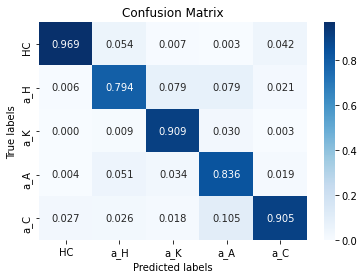

In [10]:
#  続き 1fold 22 epoch finished
def decay_schedule(epoch, lr):
  # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
  if (epoch % 80 == 0) and (epoch != 0):
      lr = lr * 0.1
  return lr

i = 6
# print("HC", np.where(np.argmax(train_label_list[i], axis=1)==0)[0].shape)
# print("H", np.where(np.argmax(train_label_list[i], axis=1)==1)[0].shape)
# print("K", np.where(np.argmax(train_label_list[i], axis=1)==2)[0].shape)
# print("A", np.where(np.argmax(train_label_list[i], axis=1)==3)[0].shape)
# print("C", np.where(np.argmax(train_label_list[i], axis=1)==4)[0].shape)

# checkpointの設定
checkpoint = ModelCheckpoint(
                  filepath="drive/MyDrive/saved_models/checkpoints/{}fold_{}.h5".format(i, NAME),
                    monitor='val_loss',
                    save_best_only=True,
                    period=1,
                    verbose=1
                )

model = build_model()
# model.load_weights('/content/drive/MyDrive/saved_models/checkpoints//5fold_test_oversampleing_without_HC_3DGRF_APCOP_LSTM_5class_stratified_group.h5')
model.compile(
    loss='categorical_crossentropy',
    # loss = custom_cross_entropy,
    optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
    metrics=['acc'],
    # class_weight=class_weight
          )

result = model.fit(
    x=train_LSTM_data_list[i], 
    y=used_train_label_list[i], 
    batch_size=63, 
    epochs=400, 
    verbose=1,
    validation_data=(
        val_LSTM_data_list[i], 
        val_label_list[i]
          ),
    callbacks=[early_stopping, checkpoint, lr_scheduler]
    )

print("results per {}-fold".format(i))
history.append(model.evaluate(
    x=val_LSTM_data_list[i], 
    y=val_label_list[i], 
    verbose=1))
# save weights
# file_name = "{}fold_{}".format(i, NAME)
# model.save(file_name+'.h5')

  # 混合行列
predict_prob = model.predict(val_LSTM_data_list[i])
predict_classes=np.argmax(predict_prob,axis=1)
true_classes = val_label_list[i]
true_classes=np.argmax(true_classes, axis=1)
cmx = confusion_matrix(true_classes, predict_classes)
cmx_list.append(cmx)
print(cmx)

index = ["HC", "a_H", "a_K", "a_A", "a_C"]

report = classification_report(true_classes, predict_classes, target_names=index)
report_list.append(report)
print(report)

cmx_data = []
for i in range(len(cmx)):
  for j in range(len(cmx)): 
    cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

ax= plt.subplot()
sns.heatmap(cmx_data, annot=True, ax = ax, fmt="1.3f", cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(index) 
ax.yaxis.set_ticklabels(index)
plt.show()

# i = i + 1



# plt.plot(result.history['acc'])
# plt.plot(result.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.grid()
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()

# plt.plot(result.history['loss'])
# plt.plot(result.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.grid()
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()

# now = datetime.datetime.now()
# with open("cmx_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(cmx_list, f)
# f.close()

# with open("classification_report_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(report_list, f)
# f.close()

In [ ]:
import gc 
gc.collect()

In [16]:
# test 
with open("/content/drive/MyDrive/test_data/V_test.pickle", mode="rb") as f:
   test_V = pickle.load(f)
f.close()
with open("/content/drive/MyDrive/test_data/AP_test.pickle", mode="rb") as f:
   test_AP = pickle.load(f)
f.close()
with open("/content/drive/MyDrive/test_data/ML_test.pickle", mode="rb") as f:
   test_ML = pickle.load(f)
f.close()

with open("/content/drive/MyDrive/test_data/COP_AP_test.pickle", mode="rb") as f:
   test_COP_AP = pickle.load(f)
f.close()
with open("/content/drive/MyDrive/test_data/COP_ML_test.pickle", mode="rb") as f:
   test_COP_ML = pickle.load(f)
f.close()

with open("/content/drive/MyDrive/test_data/label_test.pickle", mode="rb") as f:
   test_label = pickle.load(f)
f.close()

with open("/content/drive/MyDrive/test_data/test_data_index.pickle", mode="rb") as f:
   test_index = pickle.load(f)
f.close()

In [17]:
# min_max normalizationする場合
from sklearn import preprocessing
mmscaler_LSTM = preprocessing.MinMaxScaler(feature_range=(-1, 1), copy=True) # インスタンスの作成、活性化関数でtanhを使うのでfeature_range=(-1,1) 
# mmscaler_CNN = preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True) # インスタンスの作成、活性化関数でtanhを使うのでfeature_range=(-1,1)

# LSTM
mmscaler_LSTM.fit(test_V)
test_V = mmscaler_LSTM.transform(test_V)
test_V = test_V.reshape(test_V.shape[0], test_V.shape[1], 1)

mmscaler_LSTM.fit(test_AP)
test_AP = mmscaler_LSTM.transform(test_AP)
test_AP = test_AP.reshape(test_AP.shape[0], test_AP.shape[1], 1)

mmscaler_LSTM.fit(test_ML)
test_ML = mmscaler_LSTM.transform(test_ML)
test_ML = test_ML.reshape(test_ML.shape[0], test_ML.shape[1], 1)

mmscaler_LSTM.fit(test_COP_AP)
test_COP_AP = mmscaler_LSTM.transform(test_COP_AP)
test_COP_AP = test_COP_AP.reshape(test_COP_AP.shape[0], test_COP_AP.shape[1], 1)

# mmscaler_LSTM.fit(test_COP_ML)
# test_COP_ML = mmscaler_LSTM.transform(test_COP_ML)
# test_COP_ML = test_COP_ML.reshape(test_COP_ML.shape[0], test_COP_ML.shape[1], 1)

test_x = np.concatenate([test_V[test_index], test_AP[test_index], test_ML[test_index], test_COP_AP[test_index]], axis=2)
test_y = test_label[test_index]
test_y = keras.utils.to_categorical(test_y, classes_main)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 101, 1024)         2117632   
_________________________________________________________________
layer_normalization_2 (Layer (None, 101, 1024)         2048      
_________________________________________________________________
activation_12 (Activation)   (None, 101, 1024)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 101, 1024)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 103424)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               52953600  
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)              

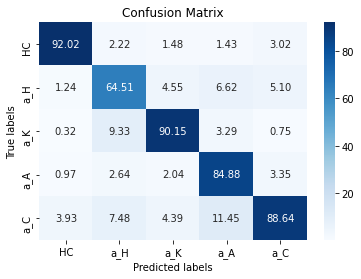

In [19]:
# test 
model = build_model()
model.load_weights('/content/drive/MyDrive/saved_models/checkpoints/0fold_test_oversampleing_without_HC_3DGRF_APCOP_LSTM_5class_stratified_group.h5')
model.compile(loss='categorical_crossentropy', 
          optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
          metrics=['accuracy']
)
  # 混合行列
predict_prob = model.predict(test_x)
predict_classes=np.argmax(predict_prob,axis=1)
true_classes = test_y
true_classes=np.argmax(true_classes, axis=1)
cmx = confusion_matrix(true_classes, predict_classes)
cmx_list.append(cmx)
print(cmx)

index = ["HC", "a_H", "a_K", "a_A", "a_C"]

report = classification_report(true_classes, predict_classes, target_names=index, digits=5)
report_list.append(report)
print(report)

cmx_data = []
for i in range(len(cmx)):
  for j in range(len(cmx)): 
    cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

ax= plt.subplot()
sns.heatmap(cmx_data*100, annot=True, ax = ax, fmt="1.2f", cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(index) 
ax.yaxis.set_ticklabels(index)
plt.show()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_3 (Bidirection (None, 101, 1024)         2117632   
_________________________________________________________________
layer_normalization_3 (Layer (None, 101, 1024)         2048      
_________________________________________________________________
activation_18 (Activation)   (None, 101, 1024)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 101, 1024)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 103424)            0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               52953600  
_________________________________________________________________
batch_normalization_15 (Batc (None, 512)              

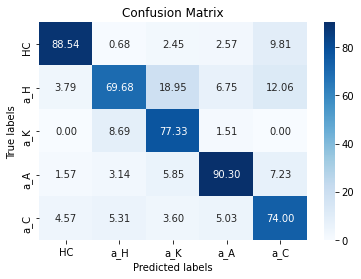

In [20]:
# test 
model = build_model()
model.load_weights('/content/drive/MyDrive/saved_models/checkpoints/1fold_test_oversampleing_without_HC_3DGRF_APCOP_LSTM_5class_stratified_group.h5')
model.compile(loss='categorical_crossentropy', 
          optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
          metrics=['accuracy']
)
  # 混合行列
predict_prob = model.predict(test_x)
predict_classes=np.argmax(predict_prob,axis=1)
true_classes = test_y
true_classes=np.argmax(true_classes, axis=1)
cmx = confusion_matrix(true_classes, predict_classes)
cmx_list.append(cmx)
print(cmx)

index = ["HC", "a_H", "a_K", "a_A", "a_C"]

report = classification_report(true_classes, predict_classes, target_names=index, digits=5)
report_list.append(report)
print(report)

cmx_data = []
for i in range(len(cmx)):
  for j in range(len(cmx)): 
    cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

ax= plt.subplot()
sns.heatmap(cmx_data*100, annot=True, ax = ax, fmt="1.2f", cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(index) 
ax.yaxis.set_ticklabels(index)
plt.show()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection (None, 101, 1024)         2117632   
_________________________________________________________________
layer_normalization_4 (Layer (None, 101, 1024)         2048      
_________________________________________________________________
activation_24 (Activation)   (None, 101, 1024)         0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 101, 1024)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 103424)            0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               52953600  
_________________________________________________________________
batch_normalization_20 (Batc (None, 512)              

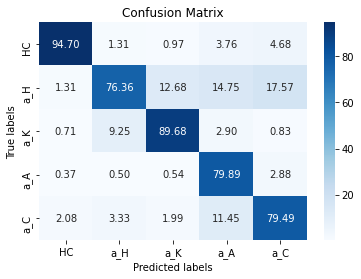

In [21]:
# test 
model = build_model()
model.load_weights('/content/drive/MyDrive/saved_models/checkpoints/2fold_test_oversampleing_without_HC_3DGRF_APCOP_LSTM_5class_stratified_group.h5')
model.compile(loss='categorical_crossentropy', 
          optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
          metrics=['accuracy']
)
  # 混合行列
predict_prob = model.predict(test_x)
predict_classes=np.argmax(predict_prob,axis=1)
true_classes = test_y
true_classes=np.argmax(true_classes, axis=1)
cmx = confusion_matrix(true_classes, predict_classes)
cmx_list.append(cmx)
print(cmx)

index = ["HC", "a_H", "a_K", "a_A", "a_C"]

report = classification_report(true_classes, predict_classes, target_names=index, digits=5)
report_list.append(report)
print(report)

cmx_data = []
for i in range(len(cmx)):
  for j in range(len(cmx)): 
    cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

ax= plt.subplot()
sns.heatmap(cmx_data*100, annot=True, ax = ax, fmt="1.2f", cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(index) 
ax.yaxis.set_ticklabels(index)
plt.show()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_5 (Bidirection (None, 101, 1024)         2117632   
_________________________________________________________________
layer_normalization_5 (Layer (None, 101, 1024)         2048      
_________________________________________________________________
activation_30 (Activation)   (None, 101, 1024)         0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 101, 1024)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 103424)            0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               52953600  
_________________________________________________________________
batch_normalization_25 (Batc (None, 512)              

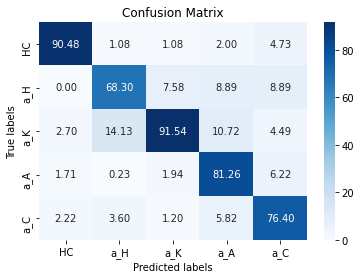

In [22]:
# test 
model = build_model()
model.load_weights('/content/drive/MyDrive/saved_models/checkpoints/3fold_test_oversampleing_without_HC_3DGRF_APCOP_LSTM_5class_stratified_group.h5')
model.compile(loss='categorical_crossentropy', 
          optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
          metrics=['accuracy']
)
  # 混合行列
predict_prob = model.predict(test_x)
predict_classes=np.argmax(predict_prob,axis=1)
true_classes = test_y
true_classes=np.argmax(true_classes, axis=1)
cmx = confusion_matrix(true_classes, predict_classes)
cmx_list.append(cmx)
print(cmx)

index = ["HC", "a_H", "a_K", "a_A", "a_C"]

report = classification_report(true_classes, predict_classes, target_names=index, digits=5)
report_list.append(report)
print(report)

cmx_data = []
for i in range(len(cmx)):
  for j in range(len(cmx)): 
    cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

ax= plt.subplot()
sns.heatmap(cmx_data*100, annot=True, ax = ax, fmt="1.2f", cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(index) 
ax.yaxis.set_ticklabels(index)
plt.show()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_6 (Bidirection (None, 101, 1024)         2117632   
_________________________________________________________________
layer_normalization_6 (Layer (None, 101, 1024)         2048      
_________________________________________________________________
activation_36 (Activation)   (None, 101, 1024)         0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 101, 1024)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 103424)            0         
_________________________________________________________________
dense_30 (Dense)             (None, 512)               52953600  
_________________________________________________________________
batch_normalization_30 (Batc (None, 512)              

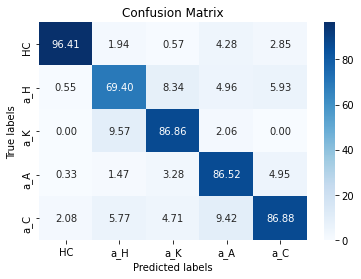

In [23]:
# test 
model = build_model()
model.load_weights('/content/drive/MyDrive/saved_models/checkpoints/4fold_test_oversampleing_without_HC_3DGRF_APCOP_LSTM_5class_stratified_group.h5')
model.compile(loss='categorical_crossentropy', 
          optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
          metrics=['accuracy']
)
  # 混合行列
predict_prob = model.predict(test_x)
predict_classes=np.argmax(predict_prob,axis=1)
true_classes = test_y
true_classes=np.argmax(true_classes, axis=1)
cmx = confusion_matrix(true_classes, predict_classes)
cmx_list.append(cmx)
print(cmx)

index = ["HC", "a_H", "a_K", "a_A", "a_C"]

report = classification_report(true_classes, predict_classes, target_names=index, digits=5)
report_list.append(report)
print(report)

cmx_data = []
for i in range(len(cmx)):
  for j in range(len(cmx)): 
    cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

ax= plt.subplot()
sns.heatmap(cmx_data*100, annot=True, ax = ax, fmt="1.2f", cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(index) 
ax.yaxis.set_ticklabels(index)
plt.show()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_7 (Bidirection (None, 101, 1024)         2117632   
_________________________________________________________________
layer_normalization_7 (Layer (None, 101, 1024)         2048      
_________________________________________________________________
activation_42 (Activation)   (None, 101, 1024)         0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 101, 1024)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 103424)            0         
_________________________________________________________________
dense_35 (Dense)             (None, 512)               52953600  
_________________________________________________________________
batch_normalization_35 (Batc (None, 512)              

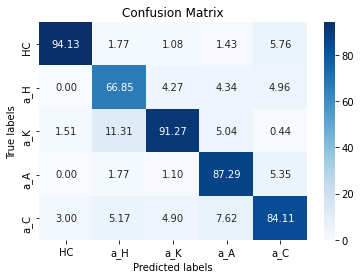

In [24]:
# test 
model = build_model()
model.load_weights('/content/drive/MyDrive/saved_models/checkpoints/5fold_test_oversampleing_without_HC_3DGRF_APCOP_LSTM_5class_stratified_group.h5')
model.compile(loss='categorical_crossentropy', 
          optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
          metrics=['accuracy']
)
  # 混合行列
predict_prob = model.predict(test_x)
predict_classes=np.argmax(predict_prob,axis=1)
true_classes = test_y
true_classes=np.argmax(true_classes, axis=1)
cmx = confusion_matrix(true_classes, predict_classes)
cmx_list.append(cmx)
print(cmx)

index = ["HC", "a_H", "a_K", "a_A", "a_C"]

report = classification_report(true_classes, predict_classes, target_names=index, digits=5)
report_list.append(report)
print(report)

cmx_data = []
for i in range(len(cmx)):
  for j in range(len(cmx)): 
    cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

ax= plt.subplot()
sns.heatmap(cmx_data*100, annot=True, ax = ax, fmt="1.2f", cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(index) 
ax.yaxis.set_ticklabels(index)
plt.show()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 101, 1024)         2117632   
_________________________________________________________________
layer_normalization_1 (Layer (None, 101, 1024)         2048      
_________________________________________________________________
activation_6 (Activation)    (None, 101, 1024)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 101, 1024)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 103424)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               52953600  
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)              

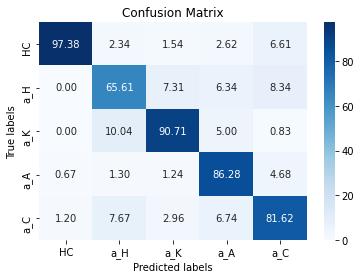

In [18]:
# test 
model = build_model()
model.load_weights('/content/drive/MyDrive/saved_models/checkpoints/6fold_test_oversampleing_without_HC_3DGRF_APCOP_LSTM_5class_stratified_group.h5')
model.compile(loss='categorical_crossentropy', 
          optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
          metrics=['accuracy']
)
  # 混合行列
predict_prob = model.predict(test_x)
predict_classes=np.argmax(predict_prob,axis=1)
true_classes = test_y
true_classes=np.argmax(true_classes, axis=1)
cmx = confusion_matrix(true_classes, predict_classes)
cmx_list.append(cmx)
print(cmx)

index = ["HC", "a_H", "a_K", "a_A", "a_C"]

report = classification_report(true_classes, predict_classes, target_names=index, digits=5)
report_list.append(report)
print(report)

cmx_data = []
for i in range(len(cmx)):
  for j in range(len(cmx)): 
    cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

ax= plt.subplot()
sns.heatmap(cmx_data*100, annot=True, ax = ax, fmt="1.2f", cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(index) 
ax.yaxis.set_ticklabels(index)
plt.show()

In [25]:
import numpy as np
print("validation: samples / class")
print(np.where(np.argmax(val_label_list[0], axis=1)==0)[0].shape)
print(np.where(np.argmax(val_label_list[0], axis=1)==1)[0].shape)
print(np.where(np.argmax(val_label_list[0], axis=1)==2)[0].shape)
print(np.where(np.argmax(val_label_list[0], axis=1)==3)[0].shape)
print(np.where(np.argmax(val_label_list[0], axis=1)==4)[0].shape)
print("training: samples / class")
print(np.where(np.argmax(used_train_label_list[0], axis=1)==0)[0].shape)
print(np.where(np.argmax(used_train_label_list[0], axis=1)==1)[0].shape)
print(np.where(np.argmax(used_train_label_list[0], axis=1)==2)[0].shape)
print(np.where(np.argmax(used_train_label_list[0], axis=1)==3)[0].shape)
print(np.where(np.argmax(used_train_label_list[0], axis=1)==4)[0].shape)
print("test: samples / class")
print(np.where(np.argmax(test_y, axis=1)==0)[0].shape)
print(np.where(np.argmax(test_y, axis=1)==1)[0].shape)
print(np.where(np.argmax(test_y, axis=1)==2)[0].shape)
print(np.where(np.argmax(test_y, axis=1)==3)[0].shape)
print(np.where(np.argmax(test_y, axis=1)==4)[0].shape)

validation: samples / class
(1804,)
(1489,)
(2478,)
(2821,)
(2286,)
training: samples / class
(23904,)
(15735,)
(15735,)
(15736,)
(15735,)
test: samples / class
(1754,)
(1451,)
(2519,)
(2989,)
(2165,)
